 #  A Whale off the Port(folio)
---

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

# Using the Pathlib libary to set the path to the CSV
whale_return_csv = Path("../Whale-Analysis_Module4Challenge/Resources/whale_returns.csv")
# Using the file path to read the CSV into a DataFrame 
whale_return_df = pd.read_csv(whale_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_return_df.sort_index(ascending=True,inplace=True)
whale_return_df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/3509269557.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_return_df = pd.read_csv(whale_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_return_df.dropna(inplace= True)
whale_return_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

# Using the Pathlib libary to set the path to the CSV
algo_return_csv = Path("../Whale-Analysis_Module4Challenge/Resources/algo_returns.csv")
# Using the file path to read the CSV into a DataFrame 
algo_return_df = pd.read_csv(algo_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_return_df.sort_index(ascending=True,inplace=True)
algo_return_df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/3406761329.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_return_df = pd.read_csv(algo_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_return_df.dropna(inplace=True)
algo_return_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

# Using the Pathlib libary to set the path to the CSV
sp500_histroy_csv = Path("../Whale-Analysis_Module4Challenge/Resources/sp500_history.csv")
# Using the file path to read the CSV into a DataFrame 
sp500_histroy_df = pd.read_csv(sp500_histroy_csv, index_col='Date',infer_datetime_format=True, parse_dates=True)
sp500_histroy_df.sort_index(ascending=True,inplace=True)
sp500_histroy_df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/2846307804.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_histroy_df = pd.read_csv(sp500_histroy_csv, index_col='Date',infer_datetime_format=True, parse_dates=True)
/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/2846307804.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_histroy_df = pd.read_csv(sp500_histroy_csv, index_col='Date',infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_histroy_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_histroy_df['Close'] =sp500_histroy_df['Close'].str.replace('$','').astype(float)
sp500_histroy_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# Daily return is calculated by subtracting the opening price from the closing price
sp500_return_df=sp500_histroy_df.pct_change()
sp500_return_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp500_return_df.dropna(inplace= True)
sp500_return_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return_df.rename(columns={'Close': 'S&P 500'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_return_df,algo_return_df,sp500_return_df],axis='columns',join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

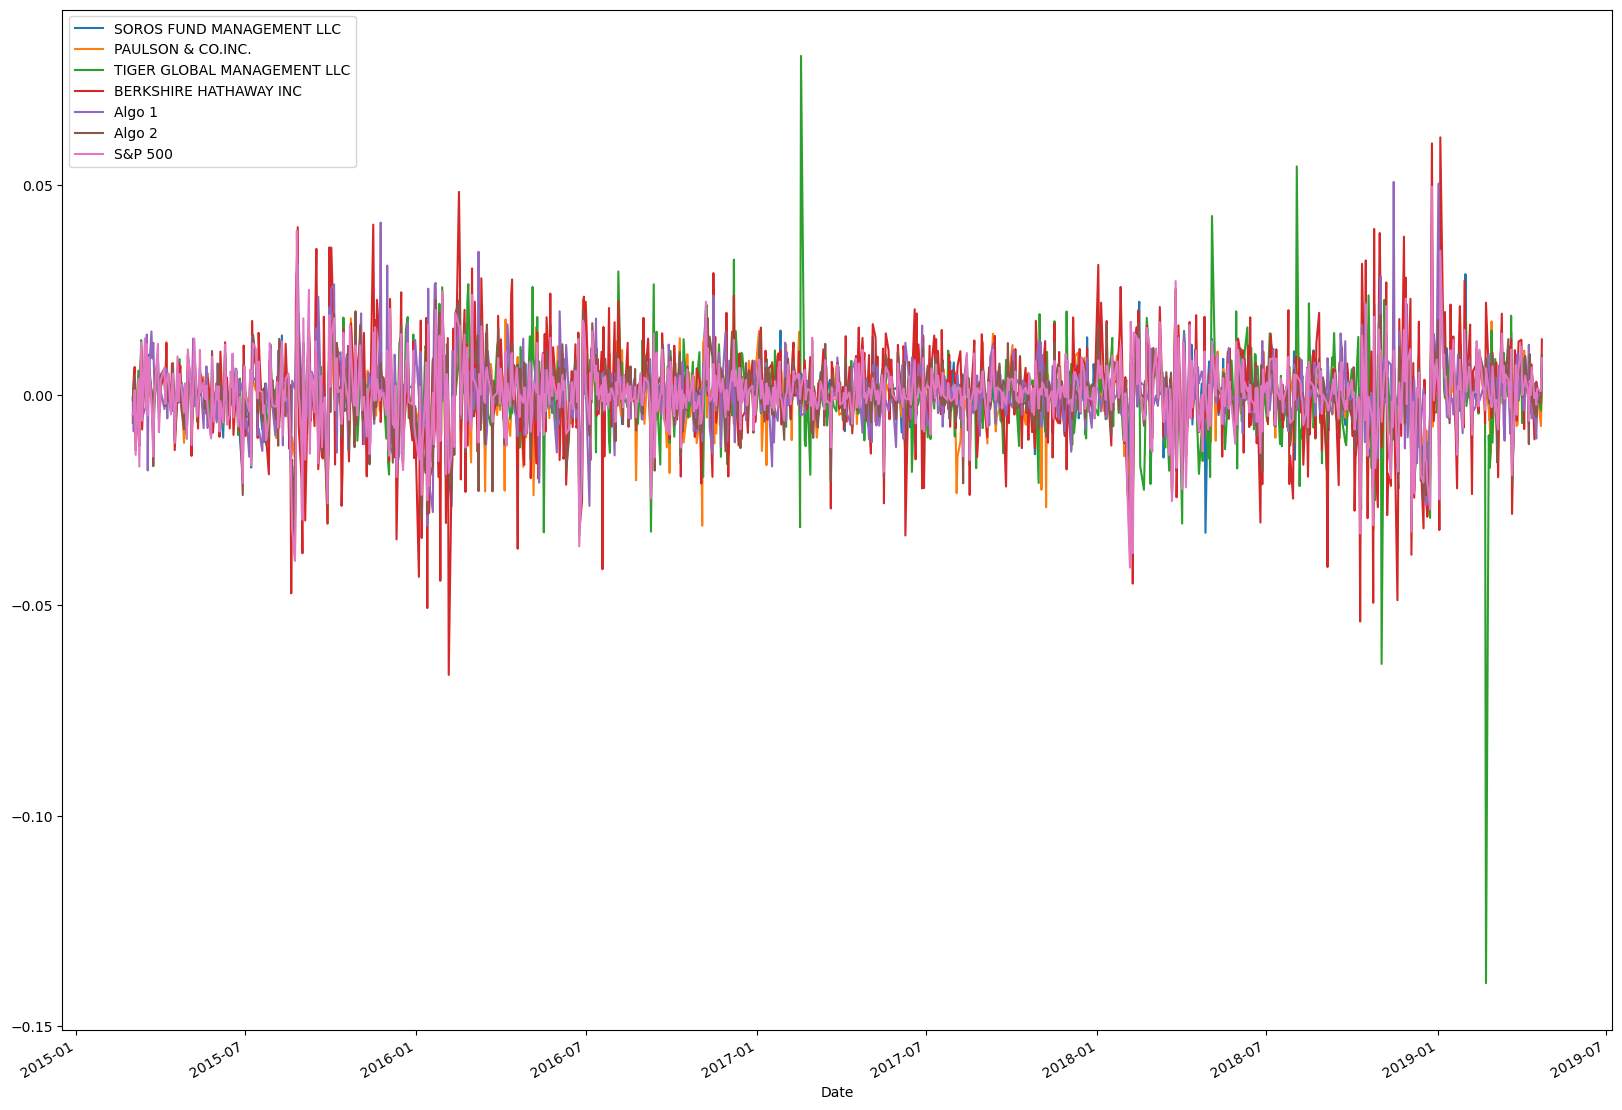

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,15))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

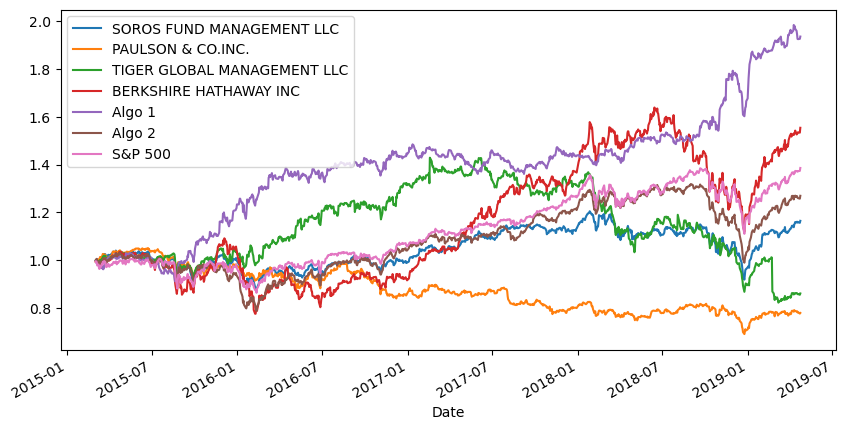

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5)) 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

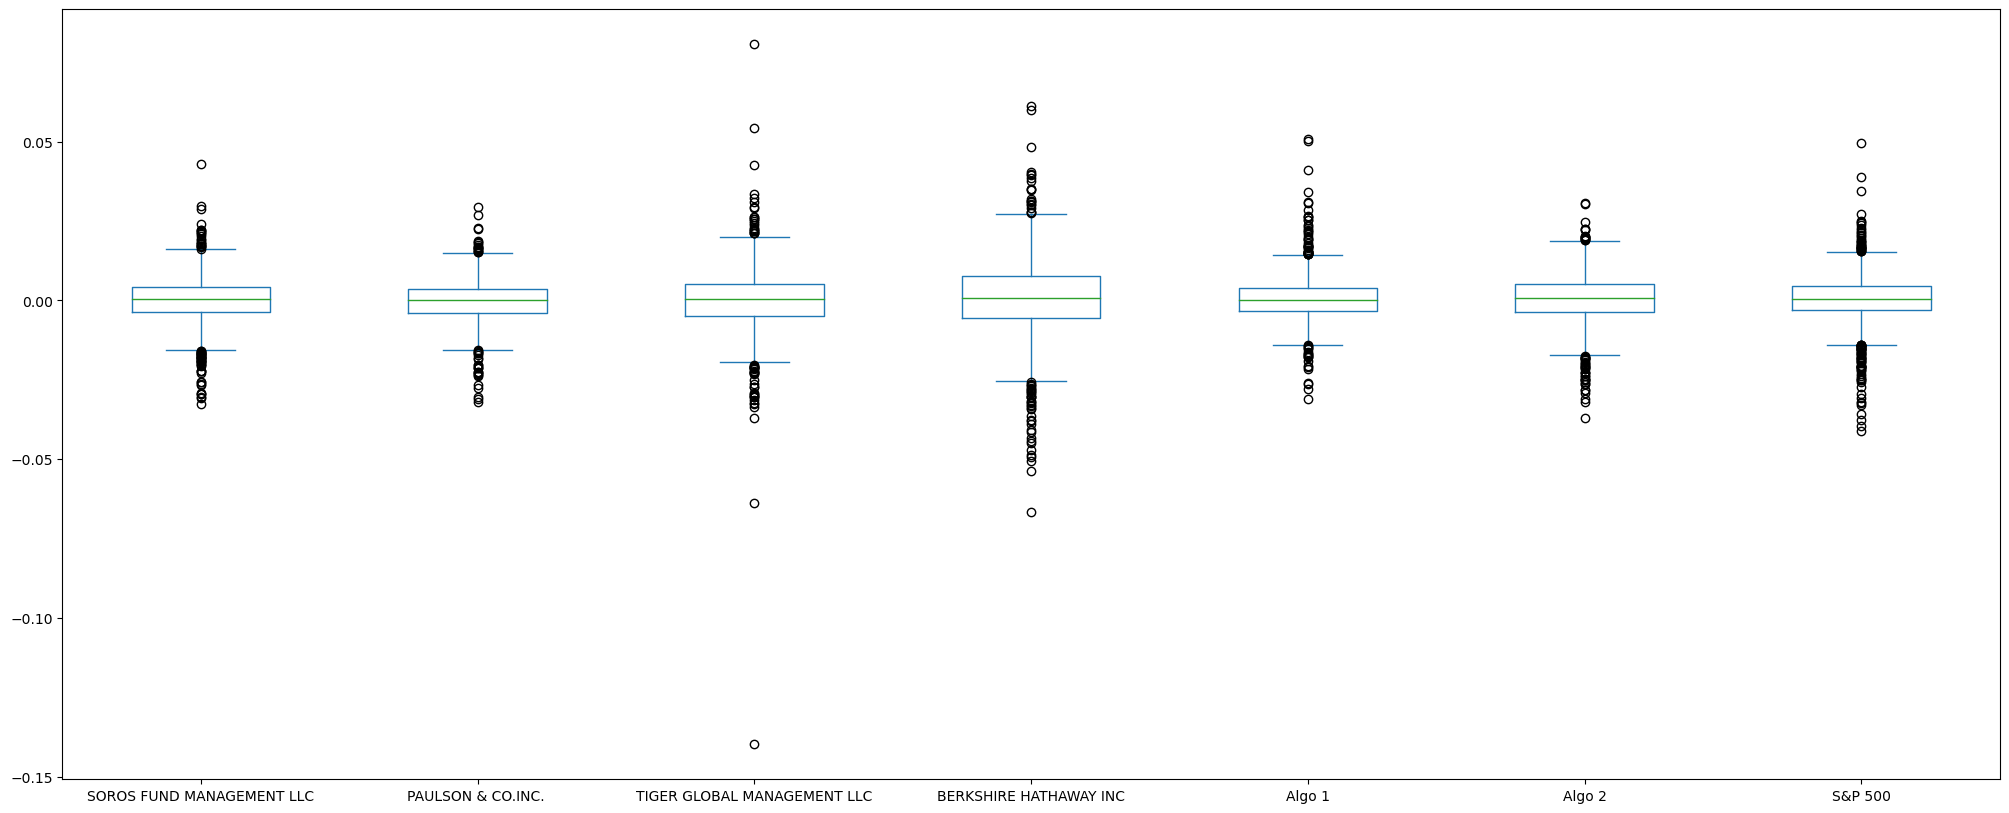

In [17]:
# Box plot to visually show risk
combined_df.plot(kind="box",figsize=(25,10))

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [38]:
# Calculate  the daily standard deviation of S&P 500
sp500_std =sp500_return_df.std()
sp500_std.head()
# Determine which portfolios are riskier than the S&P 500
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

* BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are risker than S&P 500

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
combined_asd = combined_std*np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

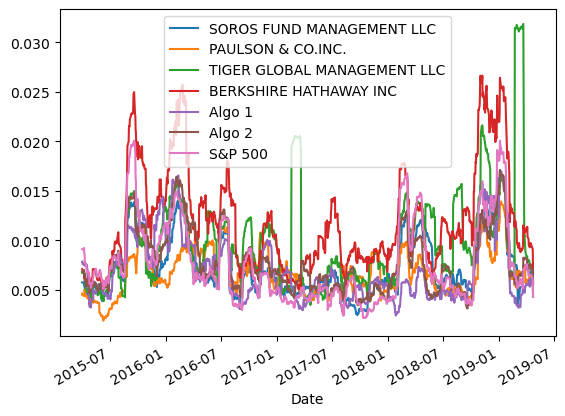

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling.plot()

### Calculate and plot the correlation

<Axes: >

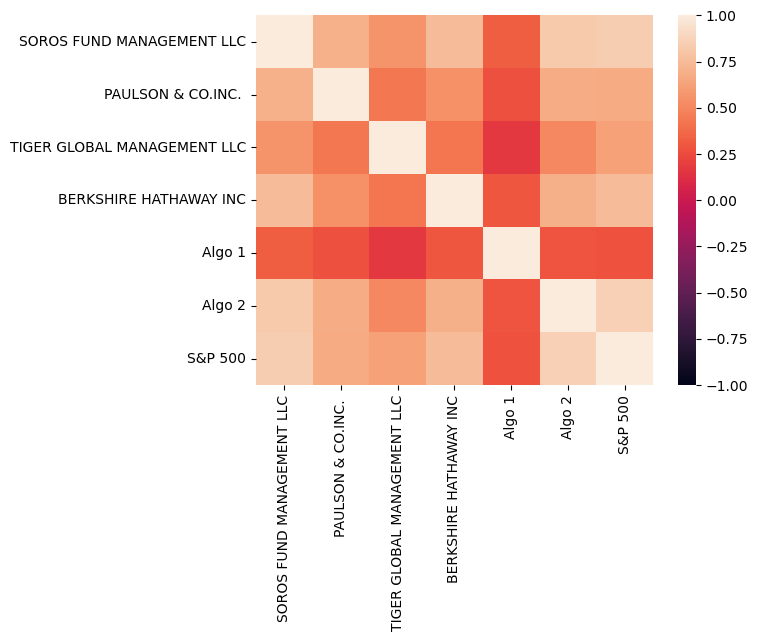

In [30]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
#HELP
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

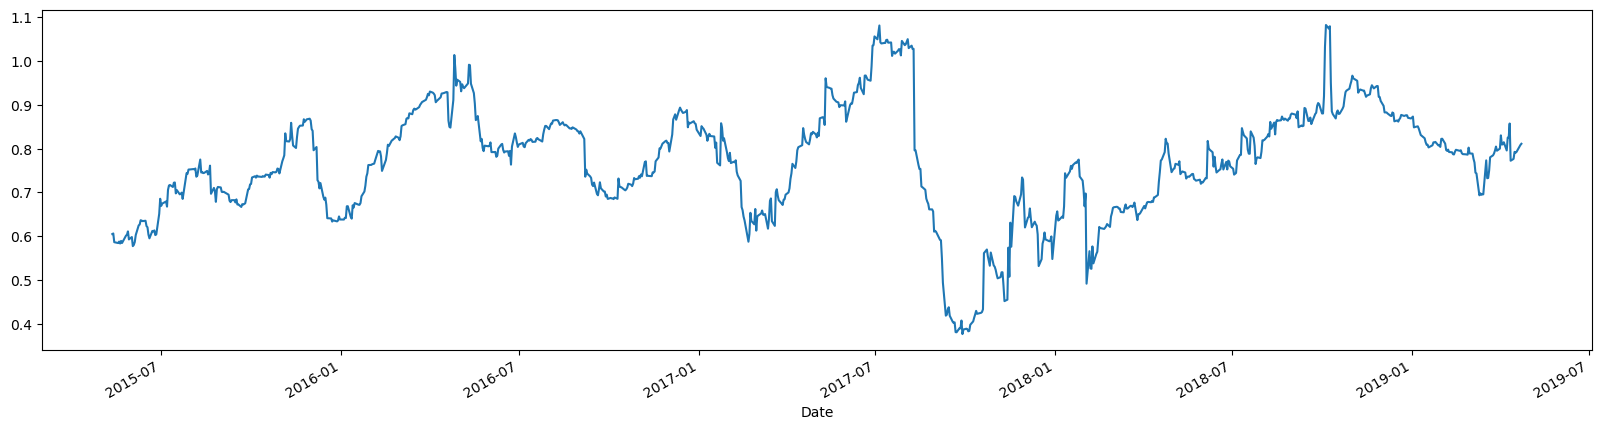

In [31]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=50).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
variance = combined_df['S&P 500'].rolling(window=50).var()
# Computing beta
combined_beta = covariance/variance
combined_beta 
# Plot beta trend
combined_beta.plot(figsize=(20,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

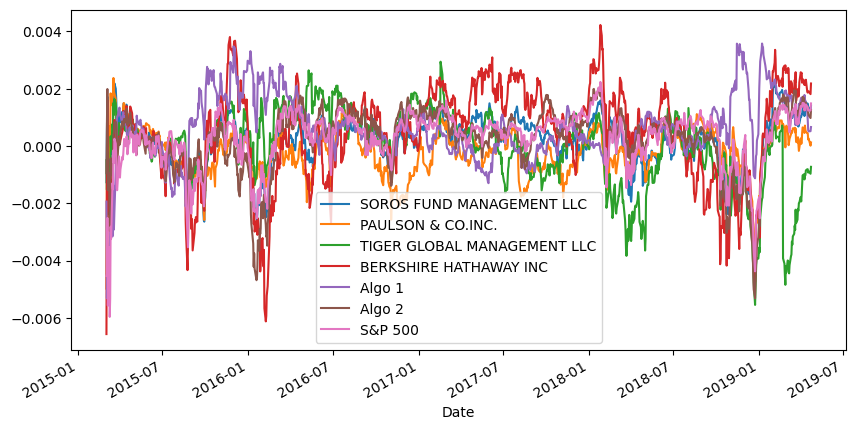

In [56]:
#HELP
# Use `ewm` to calculate the rolling window
ewm_combined = combined_df.ewm(halflife=21).mean().plot(figsize=(10,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
#HELP
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()*252/combined_asd)
sharpe_ratio.sort_values(ascending=False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: >

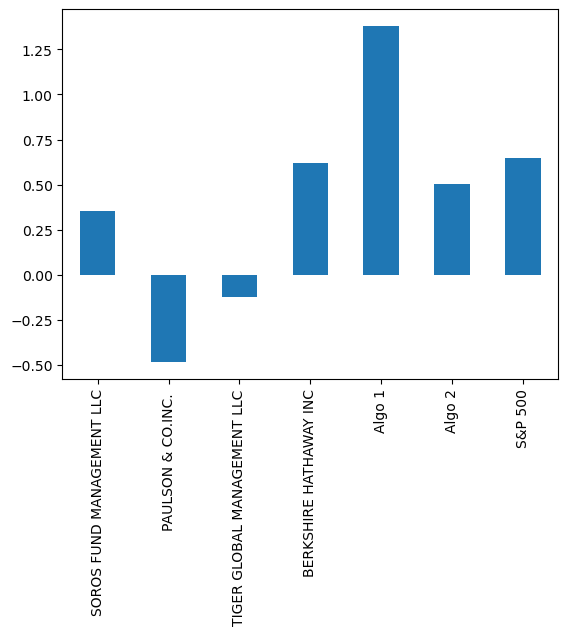

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [59]:
# Reading data from 1st stock
aapl_csv = Path("../Whale-Analysis_Module4Challenge/Resources/aapl_historical.csv")
# Using the file path to read the CSV into a DataFrame 
aapl_df = pd.read_csv(aapl_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(ascending=True,inplace=True)
aapl_df.head()
aapl_df

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/1147501603.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [60]:
# Reading data from 2nd stock
cost_csv = Path("../Whale-Analysis_Module4Challenge/Resources/cost_historical.csv")
# Using the file path to read the CSV into a DataFrame 
cost_df = pd.read_csv(cost_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(ascending=True,inplace=True)
cost_df.head()
cost_df

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/2707083344.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [61]:
# Reading data from 3rd stock
goog_csv = Path("../Whale-Analysis_Module4Challenge/Resources/goog_historical.csv")
# Using the file path to read the CSV into a DataFrame 
goog_df = pd.read_csv(goog_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(ascending=True,inplace=True)
goog_df.head()
goog_df

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_54132/3990193238.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [65]:
# Combine all stocks in a single DataFrame
combined_custom_df = pd.concat([goog_df,aapl_df,cost_df],axis='rows',join='inner')
combined_custom_df.sort_index(ascending=True,inplace=True)
combined_custom_df.head()
combined_custom_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-11,COST,195.76
2018-05-14,GOOG,1100.20
2018-05-14,AAPL,188.15
...,...,...
2019-05-08,GOOG,1166.27
2019-05-08,AAPL,202.90
2019-05-09,AAPL,200.72


In [66]:
# Reset Date index
combined_custom_df = combined_custom_df.reset_index()
combined_custom_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-11,AAPL,188.59
2,2018-05-11,COST,195.76
3,2018-05-14,GOOG,1100.20
4,2018-05-14,AAPL,188.15
...,...,...,...
745,2019-05-08,GOOG,1166.27
746,2019-05-08,AAPL,202.90
747,2019-05-09,AAPL,200.72
748,2019-05-09,GOOG,1162.38


In [68]:
# Reorganize portfolio data by having a column per symbol
combined_custom_df = combined_custom_df.pivot(values = 'NOCP', columns = 'Symbol', index = 'Trade DATE')
combined_custom_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [69]:
# Calculate daily returns
combined_custom_return = combined_custom_df.pct_change()
combined_custom_return

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [70]:
# Drop NAs
combined_custom_df.dropna(inplace=True)
combined_custom_df.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [71]:
# Display sample data
combined_custom_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return combined_custom_return
weight_portfolio_return = combined_custom_return.dot(weights)
# Display sample data and dropping nulls
weight_portfolio_return.dropna(inplace= True)
weight_portfolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [78]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns = pd.concat([combined_custom_df, combined_df], axis = "columns", join = "inner")
joined_returns.head()

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-11,188.59,195.76,1098.26,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,188.15,195.88,1100.20,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,186.44,195.48,1079.23,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,188.18,198.71,1081.77,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,186.99,199.60,1078.59,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns.dropna(inplace=True)
joined_returns.head()

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-11,188.59,195.76,1098.26,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,188.15,195.88,1100.20,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,186.44,195.48,1079.23,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,188.18,198.71,1081.77,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,186.99,199.60,1078.59,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!